In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from matplotlib import cm


import datetime as dt


sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams["figure.figsize"] = (11,4)

# pd.set_option('notebook_repr_html',True)
%matplotlib inline
pd.set_option("display.max_rows",10)

## Import Data

In [3]:

def get_data(filename):
    rows = []
    with open(filename) as f_input:
        reader = csv.reader(f_input)
        for row in reader:
            if row:
                if row[0] == '300':
                    rows.append(row[1:50])
                    
    df = pd.DataFrame(rows)
    df.set_index(pd.to_datetime(df[0], format="%Y%m%d"), inplace=True)

    df.drop(columns=[0], inplace=True)
    df.index.set_names('DATE', inplace=True)
    df = df.astype('float')
    return df

In [45]:
filename = '62036025514_20180628_20180816_20180816095107_POWERCOR_DETAILED.csv'
filename = '62036025514_20180628_20190705_20190705160638_POWERCOR_DETAILED.csv'
filename = '62036025514_20180628_20191018_20191018101202_POWERCOR_DETAILED.csv'
filename = '62036025514_20180628_20200107_20200107164659_POWERCOR_DETAILED.csv'
filename = '62036025514_20180628_20200214_20200214142826_POWERCOR_DETAILED.csv'
filename = '62036025514_20190212_20210212_20210212102821_POWERCOR_DETAILED.csv'
filename = '62036025514_20190420_20210420_20210420091402_POWERCOR_DETAILED.csv'
df = get_data(filename)
df

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
DATE,,,,,,,,,,,,,,,,,,,,,
2019-04-20,0.088,0.088,0.088,0.075,0.063,0.075,0.050,0.050,0.063,0.063,...,0.150,0.138,0.113,0.150,0.138,0.138,0.100,0.100,0.063,0.075
2019-04-21,0.075,0.063,0.075,0.063,0.063,0.063,0.075,0.075,0.063,0.050,...,0.213,0.463,0.238,0.150,0.113,0.113,0.250,0.075,0.063,0.063
2019-04-22,0.075,0.063,0.075,0.050,0.063,0.063,0.063,0.063,0.075,0.050,...,0.213,0.188,0.163,0.150,0.113,0.125,0.113,0.100,0.100,0.088
2019-04-23,0.088,0.088,0.088,0.063,0.063,0.050,0.100,0.125,0.088,0.063,...,0.313,0.375,0.200,0.150,0.138,0.125,0.113,0.075,0.075,0.075
2019-04-24,0.075,0.075,0.063,0.075,0.075,0.075,0.150,0.100,0.075,0.088,...,0.250,0.188,0.150,0.150,0.138,0.125,0.113,0.125,0.100,0.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-15,0.088,0.075,0.075,0.100,0.088,0.075,0.075,0.075,0.088,0.088,...,0.200,0.188,0.163,0.175,0.163,0.163,0.125,0.100,0.088,0.088
2021-04-16,0.075,0.088,0.088,0.088,0.075,0.088,0.088,0.088,0.063,0.088,...,0.175,0.175,0.175,0.175,0.163,0.475,0.388,0.125,0.363,0.175
2021-04-17,0.075,0.088,0.088,0.075,0.075,0.088,0.088,0.075,0.075,0.088,...,0.350,0.263,0.263,0.138,0.138,0.213,0.113,0.113,0.075,0.075


In [5]:
files = ['62036025514_20180628_20200214_20200214142826_POWERCOR_DETAILED.csv',
        '62036025514_20190212_20210212_20210212102821_POWERCOR_DETAILED.csv',
        '62036025514_20190325_20210325_20210325120705_POWERCOR_DETAILED.csv']

df_list = []
for filename in files:
    df_list.append(get_data(filename))

df = df_list[0]
for dfc in df_list[1:]:
    df = df.combine_first(dfc)
# df = pd.concat(df_list, ignore_index=False).sort_index()
df

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
DATE,,,,,,,,,,,,,,,,,,,,,
2018-06-28,0.063,0.063,0.038,0.063,0.050,0.150,0.075,0.075,0.063,0.038,...,0.275,0.275,0.313,0.413,0.250,0.175,0.475,0.213,0.563,0.088
2018-06-29,0.063,0.063,0.063,0.075,0.050,0.063,0.075,0.050,0.088,0.125,...,0.250,0.325,0.213,0.250,0.225,0.188,0.150,0.063,0.050,0.063
2018-06-30,0.063,0.050,0.050,0.063,0.063,0.050,0.050,0.063,0.038,0.063,...,0.263,0.200,0.238,0.238,0.213,0.225,0.163,0.063,0.050,0.063
2018-07-01,0.063,0.050,0.063,0.063,0.050,0.050,0.063,0.050,0.050,0.063,...,0.338,0.350,0.288,0.325,0.413,0.138,0.288,0.063,0.063,0.050
2018-07-02,0.063,0.063,0.050,0.063,0.063,0.050,0.050,0.063,0.050,0.050,...,0.288,0.400,0.438,0.488,0.213,0.325,0.088,0.050,0.050,0.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-19,0.088,0.100,0.100,0.100,0.088,0.088,0.100,0.100,0.088,0.088,...,0.225,0.213,0.188,0.188,0.138,0.125,0.100,0.100,0.100,0.100
2021-03-20,0.088,0.100,0.113,0.088,0.100,0.088,0.088,0.088,0.088,0.088,...,0.200,0.150,0.138,0.125,0.113,0.100,0.088,0.075,0.075,0.088
2021-03-21,0.088,0.088,0.075,0.075,0.075,0.088,0.088,0.075,0.075,0.088,...,0.263,0.188,0.175,0.450,0.288,0.263,0.288,0.100,0.088,0.075


In [6]:
dcf  =get_data('62038160906_20150814_20170814_20170814094649_POWERCOR_DETAILED.csv')
dcf

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
DATE,,,,,,,,,,,,,,,,,,,,,
2015-08-14,0.044,0.056,0.063,0.044,0.056,0.056,0.044,0.056,0.056,0.038,...,0.113,0.138,0.094,0.106,0.100,0.094,0.075,0.075,0.050,0.075
2015-08-15,0.069,0.050,0.069,0.050,0.044,0.056,0.056,0.044,0.056,0.144,...,0.244,0.244,0.275,0.244,0.181,0.163,0.156,0.056,0.056,0.069
2015-08-16,0.056,0.050,0.063,0.063,0.050,0.056,0.063,0.056,0.044,0.063,...,0.169,0.131,0.319,0.169,0.169,0.094,0.056,0.050,0.056,0.050
2015-08-17,0.038,0.050,0.056,0.038,0.044,0.056,0.044,0.038,0.050,0.044,...,0.250,0.263,0.238,0.138,0.150,0.081,0.069,0.063,0.056,0.050
2015-08-18,0.044,0.056,0.050,0.031,0.056,0.050,0.038,0.050,0.050,0.038,...,0.169,0.175,0.213,0.244,0.156,0.125,0.056,0.063,0.056,0.038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-09,0.050,0.038,0.050,0.050,0.038,0.044,0.056,0.044,0.038,0.050,...,0.044,0.081,0.325,0.188,0.131,0.100,0.069,0.038,0.050,0.056
2017-08-10,0.044,0.038,0.056,0.044,0.038,0.056,0.050,0.031,0.050,0.050,...,0.194,0.169,0.156,0.119,0.156,0.156,0.413,0.169,0.375,0.050
2017-08-11,0.063,0.063,0.044,0.056,0.063,0.050,0.050,0.056,0.056,0.038,...,0.206,0.219,0.138,0.144,0.150,0.100,0.088,0.075,0.069,0.056


## Get Powerpal Data


In [190]:
from datetime import datetime
from datetime import timedelta

dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

# df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)

filename = 'powerpal_data_00016633.csv'
powerpal_data = pd.read_csv(filename, parse_dates=[0], date_parser=dateparse)
powerpal_data['datetime'] = powerpal_data.datetime_utc + timedelta(hours=10)
powerpal_data.drop('datetime_utc', axis=1, inplace=True)
powerpal_data = powerpal_data.set_index('datetime')
freq = pd.infer_freq(powerpal_data.index)
powerpal_data = powerpal_data.asfreq(freq)
powerpal_data

,watt_hours,cost_dollars,is_peak
datetime,,,
2021-04-15 14:36:00,1,0.000815,False
2021-04-15 14:37:00,8,0.002371,False
2021-04-15 14:38:00,8,0.002371,False
2021-04-15 14:39:00,6,0.002060,False
2021-04-15 14:40:00,6,0.002060,False
...,...,...,...
2021-04-20 09:10:00,5,0.001749,False
2021-04-20 09:11:00,5,0.001749,False
2021-04-20 09:12:00,4,0.001438,False


In [41]:
powerpal_data_30min = powerpal_data.resample('30min').sum()
powerpal_data_30min

,watt_hours,cost_dollars,is_peak
datetime,,,
2021-04-15 14:30:00,280,0.082098,False
2021-04-15 15:00:00,186,0.060549,False
2021-04-15 15:30:00,183,0.059927,False
2021-04-15 16:00:00,188,0.061794,False
2021-04-15 16:30:00,210,0.066149,False
...,...,...,...
2021-04-20 07:00:00,104,0.038463,False
2021-04-20 07:30:00,271,0.081703,False
2021-04-20 08:00:00,468,0.131165,False


In [58]:
powerpal_data_5min = powerpal_data.resample('5min').sum()
powerpal_data_5min

,watt_hours,cost_dollars,is_peak
datetime,,,
2021-04-15 14:35:00,23,0.007617,False
2021-04-15 14:40:00,29,0.009988,False
2021-04-15 14:45:00,167,0.044207,False
2021-04-15 14:50:00,34,0.010921,False
2021-04-15 14:55:00,27,0.009366,False
...,...,...,...
2021-04-20 08:50:00,23,0.008121,False
2021-04-20 08:55:00,21,0.007499,False
2021-04-20 09:00:00,18,0.006566,False


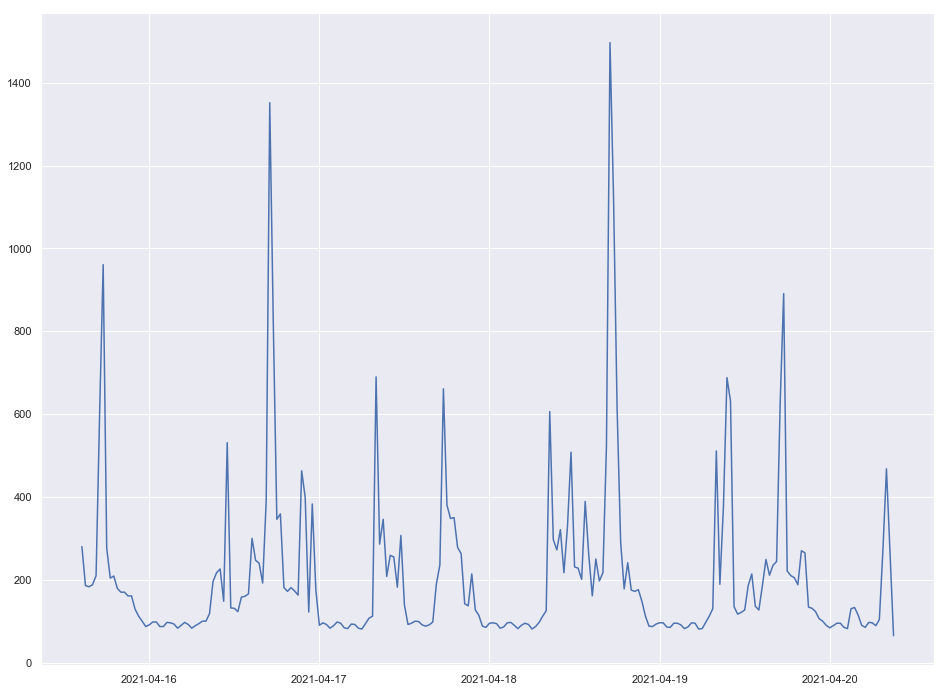

In [43]:
fig, ax = plt.subplots(figsize=(16,12))

x = powerpal_data_30min.index
y = powerpal_data_30min['watt_hours']

ax.plot(x,y)

In [56]:
powerpal_data.loc['2021-04-18']#.to_clipboard()

,watt_hours,cost_dollars,is_peak
datetime,,,
2021-04-18 00:00:00,4,0.001438,False
2021-04-18 00:01:00,4,0.001438,False
2021-04-18 00:02:00,4,0.001438,False
2021-04-18 00:03:00,4,0.001438,False
2021-04-18 00:04:00,3,0.001127,False
...,...,...,...
2021-04-18 23:55:00,3,0.001127,False
2021-04-18 23:56:00,1,0.000815,False
2021-04-18 23:57:00,3,0.001127,False


In [57]:
powerpal_data_30min.loc['2021-04-18']#.to_clipboard()

,watt_hours,cost_dollars,is_peak
datetime,,,
2021-04-18 00:00:00,95,0.036596,False
2021-04-18 00:30:00,96,0.036907,False
2021-04-18 01:00:00,94,0.036285,False
2021-04-18 01:30:00,83,0.033796,False
2021-04-18 02:00:00,86,0.034419,False
...,...,...,...
2021-04-18 21:30:00,148,0.051839,False
2021-04-18 22:00:00,112,0.040640,False
2021-04-18 22:30:00,88,0.035041,False


In [172]:
series = powerpal_data_30min.loc['2021-04-18'].watt_hours
x = series.index
freq = x.freq
x = x.union(x + 1)
# xend = (x[-1] + x.freq)
# x = np.concatenate(x.values, xend)
# np.append(x, xend)
# x[-1] + np.timedelta64()
# np.append(x.values, [x[-1] + freq])
# x.union(x[-1] + x.freq)
# print((x + 1))
x.values

array(['2021-04-18T00:00:00.000000000', '2021-04-18T00:30:00.000000000',
       '2021-04-18T01:00:00.000000000', '2021-04-18T01:30:00.000000000',
       '2021-04-18T02:00:00.000000000', '2021-04-18T02:30:00.000000000',
       '2021-04-18T03:00:00.000000000', '2021-04-18T03:30:00.000000000',
       '2021-04-18T04:00:00.000000000', '2021-04-18T04:30:00.000000000',
       '2021-04-18T05:00:00.000000000', '2021-04-18T05:30:00.000000000',
       '2021-04-18T06:00:00.000000000', '2021-04-18T06:30:00.000000000',
       '2021-04-18T07:00:00.000000000', '2021-04-18T07:30:00.000000000',
       '2021-04-18T08:00:00.000000000', '2021-04-18T08:30:00.000000000',
       '2021-04-18T09:00:00.000000000', '2021-04-18T09:30:00.000000000',
       '2021-04-18T10:00:00.000000000', '2021-04-18T10:30:00.000000000',
       '2021-04-18T11:00:00.000000000', '2021-04-18T11:30:00.000000000',
       '2021-04-18T12:00:00.000000000', '2021-04-18T12:30:00.000000000',
       '2021-04-18T13:00:00.000000000', '2021-04-18

In [324]:
np.linspace(0, 288, num=289, endpoint=True)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [336]:
x = np.arange(0, 49)
# x = np.linspace(0, 288, num=289, endpoint=True)
xl = np.arange(289)
xl = xl.repeat(2)[1:-1]
# len(x)
xl

array([  0,   1,   1,   2,   2,   3,   3,   4,   4,   5,   5,   6,   6,
         7,   7,   8,   8,   9,   9,  10,  10,  11,  11,  12,  12,  13,
        13,  14,  14,  15,  15,  16,  16,  17,  17,  18,  18,  19,  19,
        20,  20,  21,  21,  22,  22,  23,  23,  24,  24,  25,  25,  26,
        26,  27,  27,  28,  28,  29,  29,  30,  30,  31,  31,  32,  32,
        33,  33,  34,  34,  35,  35,  36,  36,  37,  37,  38,  38,  39,
        39,  40,  40,  41,  41,  42,  42,  43,  43,  44,  44,  45,  45,
        46,  46,  47,  47,  48,  48,  49,  49,  50,  50,  51,  51,  52,
        52,  53,  53,  54,  54,  55,  55,  56,  56,  57,  57,  58,  58,
        59,  59,  60,  60,  61,  61,  62,  62,  63,  63,  64,  64,  65,
        65,  66,  66,  67,  67,  68,  68,  69,  69,  70,  70,  71,  71,
        72,  72,  73,  73,  74,  74,  75,  75,  76,  76,  77,  77,  78,
        78,  79,  79,  80,  80,  81,  81,  82,  82,  83,  83,  84,  84,
        85,  85,  86,  86,  87,  87,  88,  88,  89,  89,  90,  9

In [292]:
def repeat_values(series):
    x = series.index
    freq = x.freq
    minutes = freq.n
    x = x.union(x + 1)
    x= x.values
    x = x.repeat(2)[1:-1]
    
    y = series.values
    y = y*(60/minutes)
    y = y.repeat(2)
    return x, y

# x, y = repeat_values(powerpal_data.loc['2021-04-18'].watt_hours)

def plot_area(series):
    x, y = repeat_values(series)
    x = np.insert(x, 0, x[0])
    y = np.insert(y, 0, 0)
    
    x = np.append(x, x[-1])
    y = np.append(y, 0)
    
    

In [289]:
# np.append(y, 0)
np.insert(y, 0, 0)
# y

array([  0., 180., 180., ..., 180., 240., 240.])

In [351]:
60//30

2

In [399]:
ts = np.arange(0, 48, step=6)+2
def period_to_time(period, interval=30):
    mod = 60 // interval
    return dt.time((period //(mod))% 24,(period % (mod))*interval).strftime("%H:%M")

ts = np.arange(0, 48, step=6)+6
ts = np.arange(0, 48, step=6)+2

ts = np.arange(0, 289, step=6)
tl = [period_to_time(t, 5) for t in ts]
print(tl)

['00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30', '04:00', '04:30', '05:00', '05:30', '06:00', '06:30', '07:00', '07:30', '08:00', '08:30', '09:00', '09:30', '10:00', '10:30', '11:00', '11:30', '12:00', '12:30', '13:00', '13:30', '14:00', '14:30', '15:00', '15:30', '16:00', '16:30', '17:00', '17:30', '18:00', '18:30', '19:00', '19:30', '20:00', '20:30', '21:00', '21:30', '22:00', '22:30', '23:00', '23:30', '00:00']


In [382]:
mod = 60 // 5
# print(mod)
period = 288
(period // (mod))  % (24)

0

In [388]:
period_to_time(183, 5)

'15:15'

In [253]:
np.arange(0,60,30)

array([ 0, 30])

In [400]:
print(ts)

[  0   6  12  18  24  30  36  42  48  54  60  66  72  78  84  90  96 102
 108 114 120 126 132 138 144 150 156 162 168 174 180 186 192 198 204 210
 216 222 228 234 240 246 252 258 264 270 276 282 288]


(192, 240)

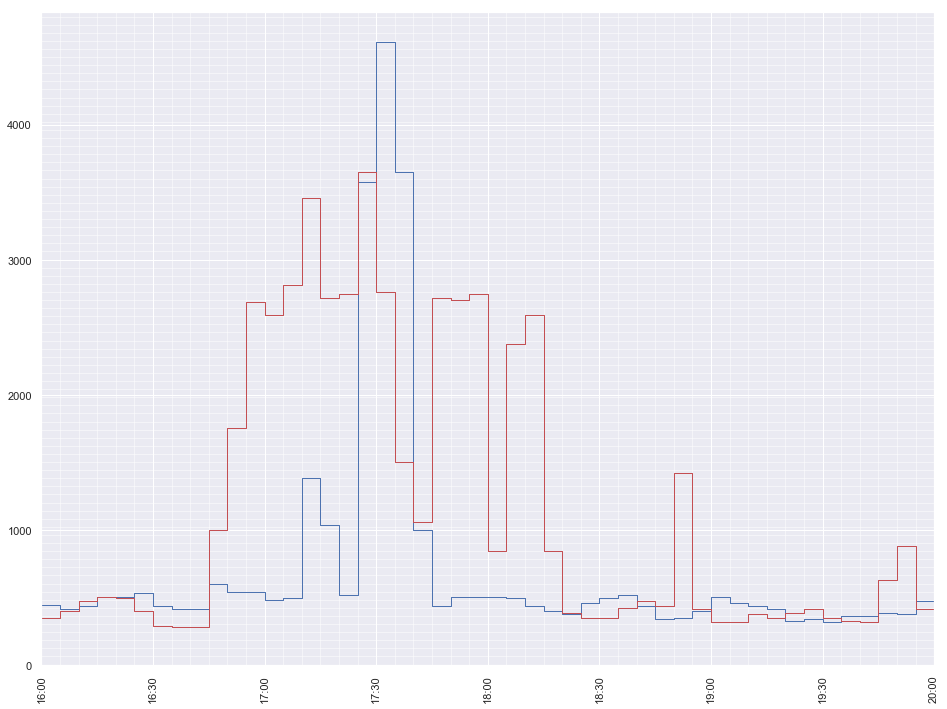

In [403]:
from matplotlib.dates import MinuteLocator, DateFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, NullFormatter)

fig, ax = plt.subplots(figsize=(16,12))

x30, y30 = repeat_values(powerpal_data_30min.loc['2021-04-19'].watt_hours)
# ax.plot(x30,y30, color='k', linewidth = 1)
# ax.fill_between(x, y, alpha=0.4, facecolor = 'grey')

x5, y5 = repeat_values(powerpal_data_5min.loc['2021-04-19'].watt_hours)
ax.plot(xl, y5, color='b', linewidth = 1)

x5, y5 = repeat_values(powerpal_data_5min.loc['2021-04-18'].watt_hours)
ax.plot(xl, y5, color='r', linewidth = 1)



x, y = repeat_values(powerpal_data.loc['2021-04-19'].watt_hours)
# ax.plot(x,y, linewidth = 1, color='green')
# ax.fill_between(x, y, alpha=0.4, facecolor = 'red')

# ax.fill_between(x, y, y>y30, alpha=0.4, facecolor = 'grey')


ax.set_xticks(ts)
ax.set_xticklabels(tl)

# majorLoc = MinuteLocator(byminute=np.arange(0,60,30))
# minorLoc = MinuteLocator(byminute=np.arange(0,60,5))
# ax.xaxis.set_major_locator(majorLoc)
# ax.xaxis.set_minor_locator(minorLoc)

# ax.xaxis.set_major_locator(MultipleLocator(6))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_minor_formatter(NullFormatter())

ax.yaxis.set_minor_locator(MultipleLocator(60))

ax.yaxis.set_minor_formatter(NullFormatter())

# ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
# ax.xaxis.set_minor_formatter(DateFormatter('%H:%M'))
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

period_to_time(period, interval=30)

ax.set_ylim(bottom=0)
ax.autoscale(axis='x', tight=True)
plt.xticks(rotation = 90, ha='center');

# )ax.set_xlim(pd.Timestamp('2021-04-19 14:00'), pd.Timestamp('2021-04-19 22:00')
ax.set_xlim(192,204+6*6)

In [307]:
len(y5)

576

In [287]:
powerpal_data_5min['2021-04-19 17:00':'2021-04-19 17:25']

,watt_hours,cost_dollars,is_peak
datetime,,,
2021-04-19 17:00:00,40,0.012165,False
2021-04-19 17:05:00,41,0.012165,False
2021-04-19 17:10:00,115,0.030830,False
2021-04-19 17:15:00,86,0.023675,False
2021-04-19 17:20:00,43,0.012788,False
2021-04-19 17:25:00,298,0.076559,False


In [95]:
x = powerpal_data_30min.loc['2021-04-18'].index.values
# x = x.repeat(2)[1:]
print(x[-1]+ np.timedelta64(30, 'm'))

2021-04-19T00:00:00.000000000


In [67]:
data_ary = powerpal_data_30min.loc['2021-04-18'].watt_hours.values
print(len(data_ary))
y = data_ary.repeat(2)
print(len(y))

48
96


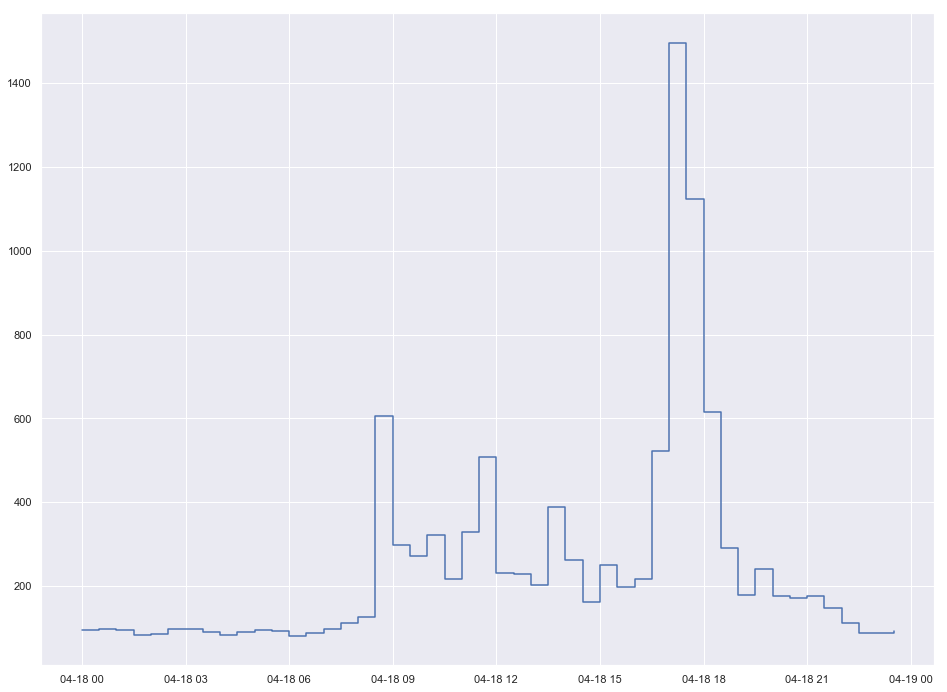

In [76]:
fig, ax = plt.subplots(figsize=(16,12))

# x = powerpal_data_30min.index
# y = powerpal_data_30min['watt_hours']

ax.plot(x,y[:-1])

In [54]:
df.loc['2021-04-18'].to_clipboard()

In [7]:
def plot_profile(df):
    percs = [0, 5, 25, 50, 75, 95, 100]
    perclist = []
    for perc in percs:
        a = df.quantile(perc/100.)
        perclist.append(a.values)
    
    
    return perclist

p = plot_profile(df)
np.shape(p)

(7, 48)

In [8]:
ts = np.arange(0, 48, step=6)+6
ts = np.arange(0, 48, step=6)+2

ts = np.arange(0, 48, step=6)+2
def period_to_time(period):
    return dt.time((period //2) % 24,(period % 2)*30).strftime("%H:%M")
tl = [period_to_time(t) for t in ts]

# (47 / 2)

In [9]:
period = 5
(period //2) % 24
(period % 2)*30

30

In [10]:
def period_to_time(period):
    return dt.time((period //2) % 24,(period % 2)*30).strftime("%H:%M")

[period_to_time(t) for t in ts]

['01:00', '04:00', '07:00', '10:00', '13:00', '16:00', '19:00', '22:00']

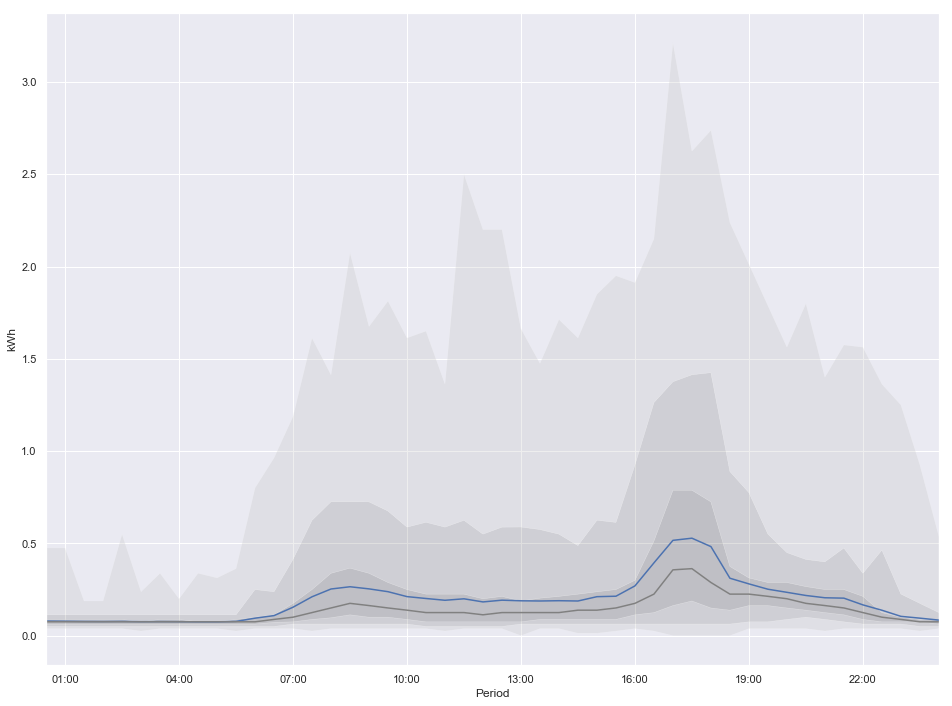

In [11]:
fig, ax = plt.subplots(figsize=(16,12))


# def plot_profile(ax, df, month, daytype):


x = np.arange(48) + 1
# x = dplot.index

# dcf.T.plot(ax = ax, legend=None, colormap='Purples')

# Plot mean
y = df.mean()
line0, = ax.plot(x, y)


# # Plot Max
# y = dplot['Maximum']
# line1, = ax.plot(x, y)

# # Plot Rolling 7.5hh avg
# y = dplot['RollingCons']
# line2, = ax.plot(x, y)

# Plot Median
y = p[3]
line3, = ax.plot(x, y, color = [0.5,0.5,0.5])


# Plot shaded area
x = np.concatenate((x, x[::-1]))
x


# 0th percentile
y = np.concatenate((p[0], p[1][::-1]))
line4, = ax.fill(x, y, alpha = 0.25, facecolor = [0.75, 0.75, 0.75], lw=0.5)

y = np.concatenate((p[1], p[2][::-1]))
line4, = ax.fill(x, y, alpha = 0.25, facecolor = [0.5, 0.5, 0.5], lw=0.5)

y = np.concatenate((p[2], p[3][::-1]))
line5, = ax.fill(x, y, alpha = 0.25, facecolor = [0.25, 0.25, 0.25], lw=0.5)

y = np.concatenate((p[3], p[4][::-1]))
line6, = ax.fill(x, y, alpha = 0.25, facecolor = [0.25, 0.25, 0.25], lw=0.5)

y = np.concatenate((p[4], p[5][::-1]))
line7, = ax.fill(x, y, alpha = 0.25, facecolor = [0.5, 0.5, 0.5], lw=0.5)

y = np.concatenate((p[5], p[6][::-1]))
line8, = ax.fill(x, y, alpha = 0.25, facecolor = [0.75, 0.75, 0.75], lw=0.5)

# ax.legend((line0, line1, line2, line3, line4, line5, line6, line7, line8), ('Mean','Max', 'Rolling Peak Day','Median', '50-75th per', '75-95th per', '95th-Max per'))

# ax.grid('On')
ax.set_xlim([1,48])
# ax.set_ylim(bottom=0)
# ax.set_ylim([0,1])
ax.set_ylabel('kWh')
ax.set_xlabel('Period')


# for t in nt:
#     ax.axvspan(t[0], t[1], alpha=0.1, facecolor = '0.65', edgecolor = '0.65')

# ax.axvline(34, color='r',linestyle = ':')
# ax.axvline(42, color='r',linestyle = ':')


# mv = dplot['Average'].iloc[14:44].mean()
# xs = np.arange(14,46)
# ys = np.ones(32)*mv
# ax.plot(xs,ys)

# djm.plot(ax=ax, colormap='spring')

# drm.plot(ax=ax, colormap='binary')

ax.set_xticks(ts)
ax.set_xticklabels([period_to_time(t) for t in ts])
ax.xaxis.grid('On')

# print mv
# ax.axhline(mv)

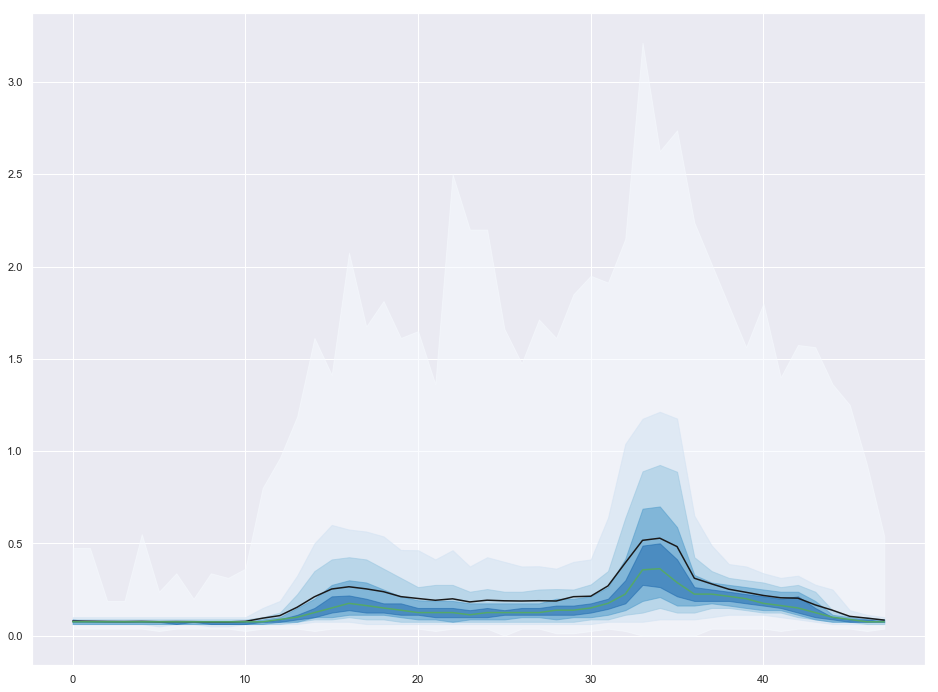

In [12]:

# FROM https://stackoverflow.com/questions/53071379/using-percentiles-of-a-timeseries-to-set-colour-gradient-in-pythons-matplotlib
n = 11
colormap = cm.Blues
percentiles = np.linspace(0,100,n)

SDist = np.zeros((48,n))
for i in range(n):
    for t in range(48):
        SDist[t, i] = np.percentile(df.iloc[:,t], percentiles[i])
        
half = int((n-1)/2)


fig, ax = plt.subplots(figsize=(16,12))

ax.plot(range(48), df.mean(axis=0), color='k')
ax.plot(range(48), SDist[:,half], color='g')

for i in range(half):
    ax.fill_between(range(48), SDist[:,i], SDist[:,-(i+1)], color=colormap(i/half), alpha = 0.5)
    
# ax.set_ylim([0, 0.5])

In [13]:
period_to_time(16)
period_to_time(34)

'17:00'

In [14]:
period = 6
(period //2) % 24,(period % 2)*30

(3, 0)

<BarContainer object of 48 artists>

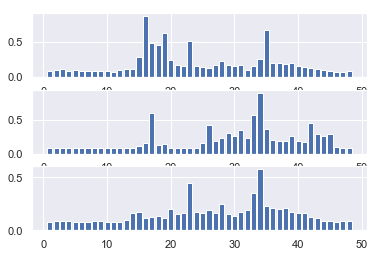

In [15]:
fig = plt.Figure(figsize=(16,10))
x = df.columns
# y1=df.loc['2018-06-29']
# y2=df.loc['2018-06-30']
# y3=df.loc['2018-07-01']

y1=df.loc['2021-03-20']
y2=df.loc['2021-03-21']
y3=df.loc['2021-03-22']

ax1 = plt.subplot(3,1,1)
ax1.bar(x, y1)

ax2 = plt.subplot(3,1,2)
ax2.bar(x, y2)

ax3 = plt.subplot(3,1,3)
ax3.bar(x, y3)

Text(0, 0.5, 'Energy (kWh per half hour)')

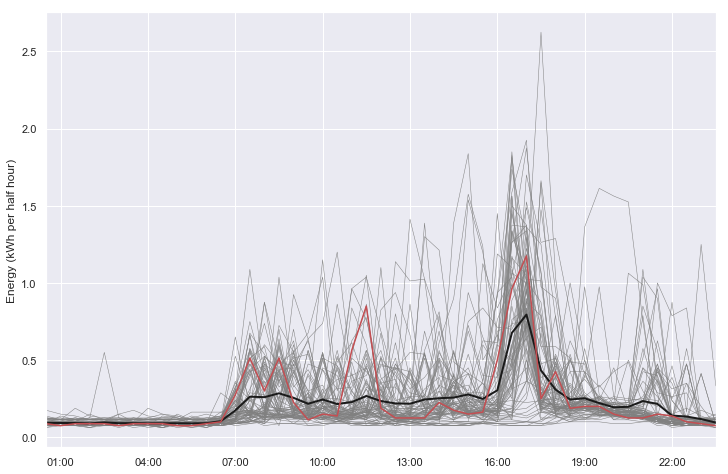

In [16]:
def plot_month(ax, df):

    for i, (name, row) in enumerate(df.iterrows()):
        d = '1'#pd.to_datetime(name[3]).strftime('%d')
#         t = row['MaxTemp']   
        color = 'grey'        
        ax.plot(row, color = color, linewidth = 0.5)

    avg = df.mean(axis=0)
    ax.plot(avg, 'k', linewidth = 2)
    ax.set_xticks(ts)
    ax.set_xticklabels(tl)
    ax.xaxis.grid('On')
#     ax.legend(loc='best', facecolor='k', framealpha=0.2, edgecolor ='k', frameon=True)
    ax.set_xlim([0,47])
    
    return avg

fig, ax = plt.subplots(figsize=(12,8))
plot_month(ax, df.loc['2021-01-01':'2021-03-31']);
y1=df.loc['2021-03-10']
# y2=df.loc['2021-03-22']
# y3=df.loc['2021-03-23']
ax.plot(y1, 'r')
ax.set_xlim([1,47])
ax.set_ylabel('Energy (kWh per half hour)')

In [19]:
def plot_hm(df):
    ytl = df.index.strftime('%a %d-%b')
#     cmap = sns.color_palette("YlOrRd",100)
    cmap = sns.color_palette("rocket_r", 40)
    labels = df.applymap(lambda v: '{:3.1f}'.format(v) if v > 1.0 else "")
    sns.heatmap(df, cmap=cmap, yticklabels=ytl, linewidth=0.01
               ,linecolor="grey"
#                ,annot = labels, annot_kws={'fontsize':10}, fmt = ''
               )#, vmin=0, vmax=3.5)
    axes = fig.gca()
#     axes.yaxis.grid(False)
    axes.set_xticks(ts);
    axes.set_xticklabels([period_to_time(t) for t in ts]);

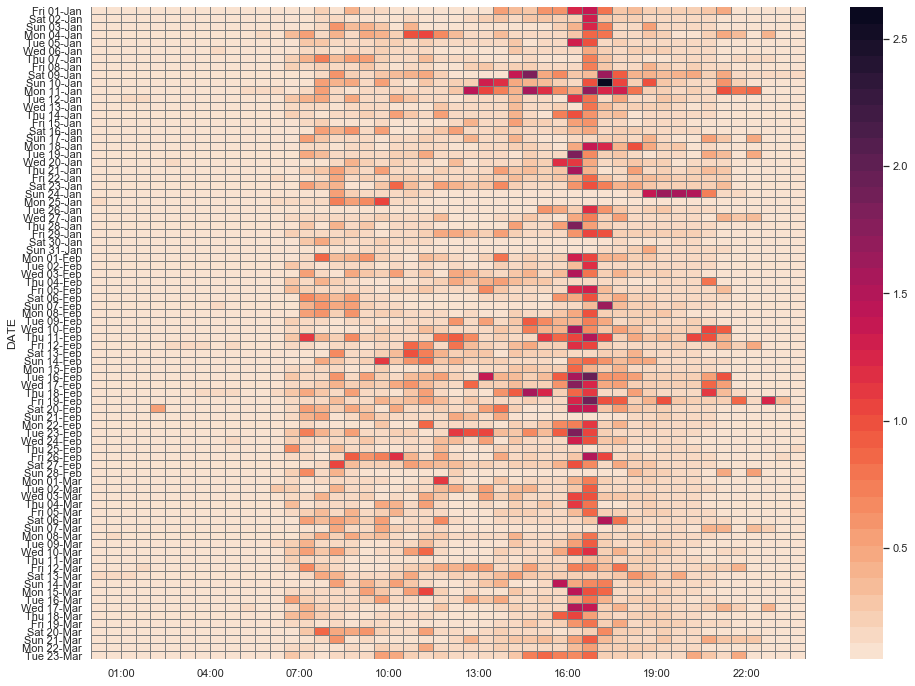

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
plot_hm(df[(df.index >='2021-01-01') & (df.index <'2021-04-01')])

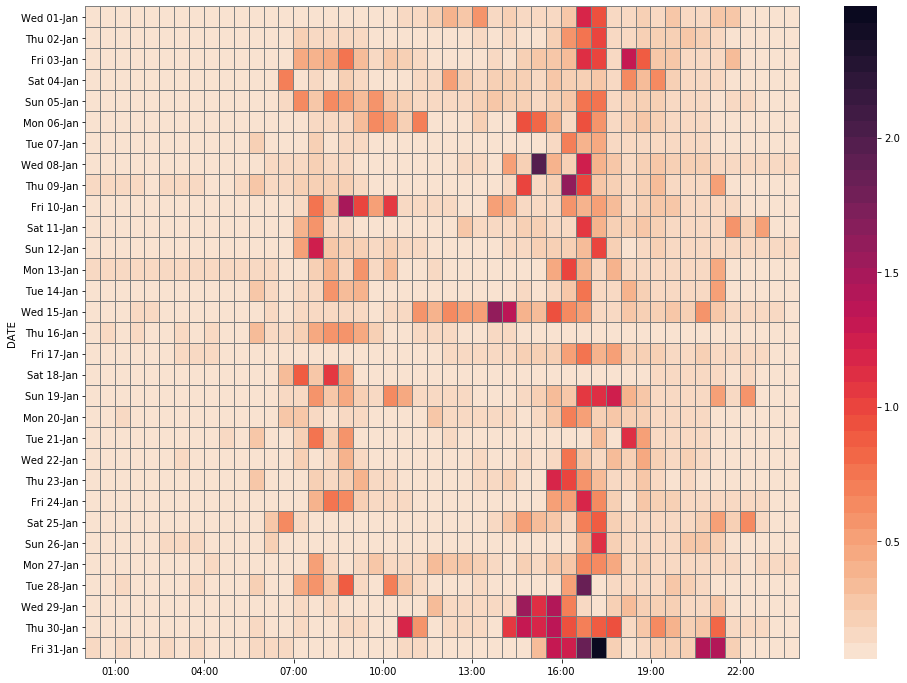

In [193]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
plot_hm(df[(df.index >='2020-01-01') & (df.index <'2020-02-01')])

In [108]:
df.sum().sum()
dcf.sum().sum()

269.202

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
           dtype='int64')


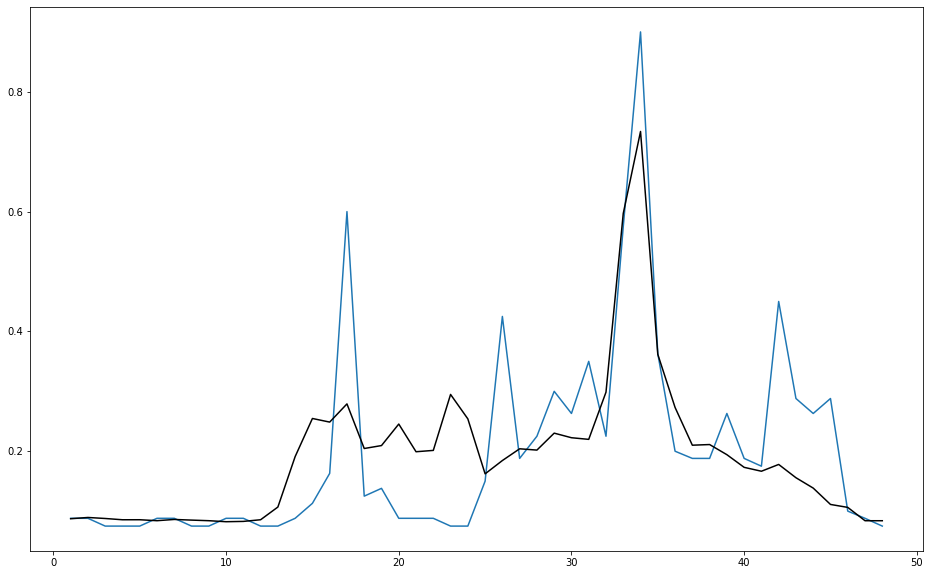

In [40]:
fig, ax = plt.subplots(figsize=(16,10))
x = df.columns

# y1=df.loc['2018-06-29']
# y2=df.loc['2018-06-30']
# y3=df.loc['2018-07-13']

# y1=df.loc['2018-12-24']
# y2=df.loc['2018-12-26']
# y3=df.loc['2018-12-01']

y1=df.loc['2021-03-21']
# y2=df.loc['2021-03-22']
# y3=df.loc['2021-03-23']



ax.plot(x, y1)
# ax.plot(x, y2)
# ax.plot(x, y3)
ax.plot(x, df.loc['2021-03-01':'2021-03-31'].mean(axis=0), 'k')
# ax.bar(x, [y1, y2, y3])
print(x)

In [178]:
df[df.index >'2021-01-07'].applymap(lambda v: '{:3.1f}'.format(v) if v > 0.2 else "")

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
DATE,,,,,,,,,,,,,,,,,,,,,
2021-01-08,,,,,,,,,,,...,0.2,,,,,,,,,
2021-01-09,,,,,,,,,,,...,0.3,0.4,0.5,0.2,0.5,,,,,
2021-01-10,,,,,,,,,,,...,0.3,,,,0.6,0.2,,,,
2021-01-11,,,,,,,,,,,...,0.2,,,,1.0,0.8,0.8,,,
2021-01-12,,,,,,,,,,,...,0.3,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-06,,,,,,,,,,,...,,,,,,,,,,
2021-02-07,,,,,,,,,,,...,,0.2,,,,,,,,
2021-02-08,,,,,,,,,,,...,0.3,,,,,,,,,


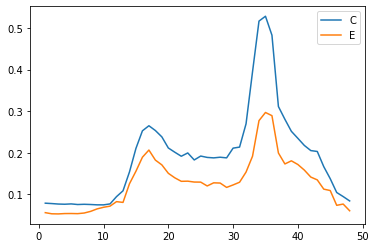

In [17]:
df.mean().plot(legend = 'Cropley')
# df.max().plot(legend = 'Cropley')
# df.std().plot()
dcf.mean().plot()
ax = plt.gca()
ax.legend(['C','E'])
# ax.plot(df.loc['2019-06-28'])

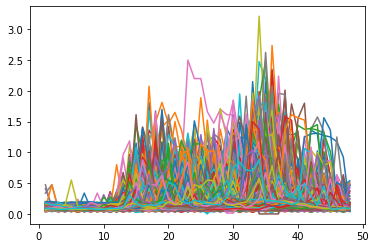

In [11]:
df.T.plot(legend=False)

## Daily

In [18]:
df_daily = df.sum(axis=1).to_frame('Cons')
dcf_daily = dcf.sum(axis=1).to_frame('Cons')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:63: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


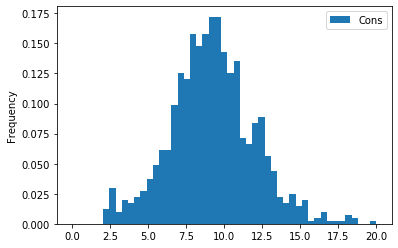

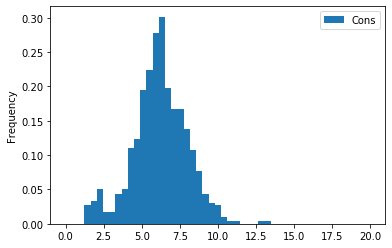

In [19]:
bins = np.arange(0,25,0.5)
bins = np.linspace(0,20,50);
df_daily.plot(kind='hist', bins=bins, normed = True)
dcf_daily.plot(kind='hist', bins=bins, normed = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


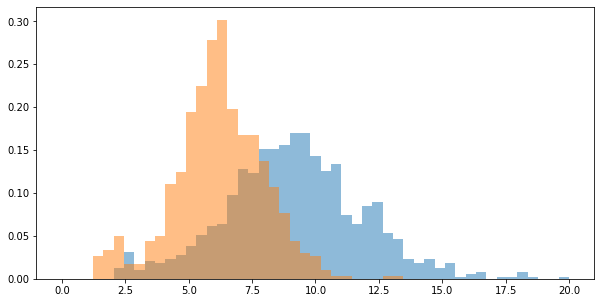

In [85]:
x1 = df_daily['Cons']
bins = np.linspace(0,20,50);
fix, ax = plt.subplots(figsize=(10,5));

ax.hist(x1, bins, histtype='stepfilled', alpha=0.5, normed=True);

x2 = dcf_daily['Cons']
ax.hist(x2, bins, histtype='stepfilled', alpha=0.5, normed=True);

In [86]:
df_daily.sort_values(by='Cons', ascending=False)

,Cons
DATE,
2018-12-01,25.463
2019-03-02,22.985
2021-01-11,20.504
2018-12-26,20.063
2019-08-04,19.786
...,...
2018-08-28,2.440
2018-09-01,2.386
2018-09-02,2.261


(0, 3867.856499999999)

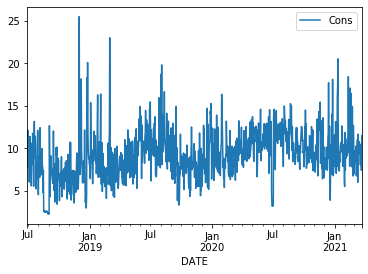

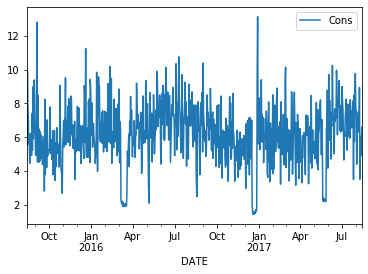

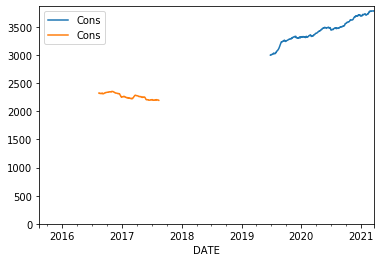

In [28]:
ax = df_daily.plot()
ax2 = dcf_daily.plot()
ax3 = df_daily.rolling(365).sum().plot()
dcf_daily.rolling(365).sum().plot(ax =ax3)
ax3.set_ylim(bottom = 0)

(0, 11.124)

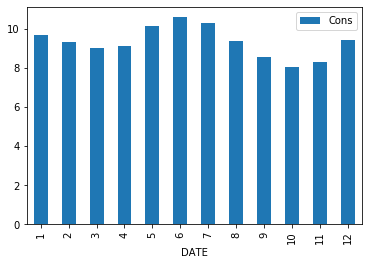

In [20]:
fig, ax = plt.subplots()
df_daily.groupby(df_daily.index.month).mean().plot(ax=ax, kind='bar')
# dcf_daily.groupby(dcf_daily.index.month).sum().plot(ax=ax, kind='bar')
ax.set_ylim(bottom=0)

In [24]:
df_daily.groupby(df_daily.index.month).mean().sum()

Cons    115.849542
dtype: float64

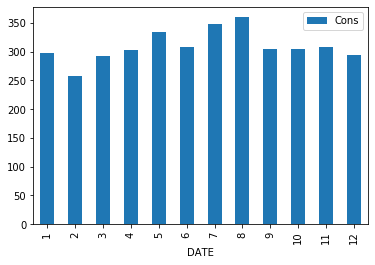

In [27]:
fig, ax = plt.subplots()
df_daily[df_daily.index.year == 2020].groupby(df_daily[df_daily.index.year == 2020].index.month).sum().plot(ax=ax, kind='bar')
# df_daily[df_daily.index.year == 2021].groupby(df_daily[df_daily.index.year == 2021].index.month).sum().plot(ax=ax, kind='bar')
# df_daily[df_daily.index.year == 2019].groupby(df_daily[df_daily.index.year == 2019].index.month).sum().plot(ax=ax, kind='bar')

# Older Stuff

In [2]:
header = ['RecordIndicator','IntervalDate']+['IntervalValue%02d'% (x+1) for x in range(48)]+['QualityMethod','ReasonCode','ReasonDescription','UpdateDateTime','MSATSLoadDateTime']

In [3]:
filename = '62038160906_20150814_20170814_lastrowremoved.txt'
if os.path.isfile(filename):
#     dateparse = lambda dates: [pd.datetime.strptime(d, '%d/%m/%Y %H:%M:%S') for d in dates]
    dateparse = lambda dates: [pd.datetime.strptime(d, '%Y%m%d') for d in dates]
    
    df = pd.read_csv(filename, 
                       names=header, 
                       skiprows=2, 
                       parse_dates=[1], 
                       date_parser=dateparse)
    print "loaded ", filename, " successfully"
else:
    print "File ", filename, " not found"
df.dropna(axis=1, how = 'all', inplace=True)
df.drop(['RecordIndicator'],1, inplace=True)
df = df[['IntervalDate','QualityMethod','UpdateDateTime']+['IntervalValue%02d' % (x+1) for x in range(48)]]
df.set_index('IntervalDate', inplace=True)
# data.index = data['IntervalDate']
# del data['IntervalDate']
df

loaded  62038160906_20150814_20170814_lastrowremoved.txt  successfully


,QualityMethod,UpdateDateTime,IntervalValue01,IntervalValue02,IntervalValue03,IntervalValue04,IntervalValue05,IntervalValue06,IntervalValue07,IntervalValue08,...,IntervalValue39,IntervalValue40,IntervalValue41,IntervalValue42,IntervalValue43,IntervalValue44,IntervalValue45,IntervalValue46,IntervalValue47,IntervalValue48
IntervalDate,,,,,,,,,,,,,,,,,,,,,
2015-08-14,A,20150815011330,0.044,0.056,0.063,0.044,0.056,0.056,0.044,0.056,...,0.113,0.138,0.094,0.106,0.100,0.094,0.075,0.075,0.050,0.075
2015-08-15,A,20150816010916,0.069,0.050,0.069,0.050,0.044,0.056,0.056,0.044,...,0.244,0.244,0.275,0.244,0.181,0.163,0.156,0.056,0.056,0.069
2015-08-16,A,20150817011118,0.056,0.050,0.063,0.063,0.050,0.056,0.063,0.056,...,0.169,0.131,0.319,0.169,0.169,0.094,0.056,0.050,0.056,0.050
2015-08-17,A,20150818010941,0.038,0.050,0.056,0.038,0.044,0.056,0.044,0.038,...,0.250,0.263,0.238,0.138,0.150,0.081,0.069,0.063,0.056,0.050
2015-08-18,A,20150819011152,0.044,0.056,0.050,0.031,0.056,0.050,0.038,0.050,...,0.169,0.175,0.213,0.244,0.156,0.125,0.056,0.063,0.056,0.038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-09,A,20170810034142,0.050,0.038,0.050,0.050,0.038,0.044,0.056,0.044,...,0.044,0.081,0.325,0.188,0.131,0.100,0.069,0.038,0.050,0.056
2017-08-10,A,20170811035756,0.044,0.038,0.056,0.044,0.038,0.056,0.050,0.031,...,0.194,0.169,0.156,0.119,0.156,0.156,0.413,0.169,0.375,0.050
2017-08-11,A,20170812034519,0.063,0.063,0.044,0.056,0.063,0.050,0.050,0.056,...,0.206,0.219,0.138,0.144,0.150,0.100,0.088,0.075,0.069,0.056


In [4]:
df.reset_index()

,IntervalDate,QualityMethod,UpdateDateTime,IntervalValue01,IntervalValue02,IntervalValue03,IntervalValue04,IntervalValue05,IntervalValue06,IntervalValue07,...,IntervalValue39,IntervalValue40,IntervalValue41,IntervalValue42,IntervalValue43,IntervalValue44,IntervalValue45,IntervalValue46,IntervalValue47,IntervalValue48
0,2015-08-14,A,20150815011330,0.044,0.056,0.063,0.044,0.056,0.056,0.044,...,0.113,0.138,0.094,0.106,0.100,0.094,0.075,0.075,0.050,0.075
1,2015-08-15,A,20150816010916,0.069,0.050,0.069,0.050,0.044,0.056,0.056,...,0.244,0.244,0.275,0.244,0.181,0.163,0.156,0.056,0.056,0.069
2,2015-08-16,A,20150817011118,0.056,0.050,0.063,0.063,0.050,0.056,0.063,...,0.169,0.131,0.319,0.169,0.169,0.094,0.056,0.050,0.056,0.050
3,2015-08-17,A,20150818010941,0.038,0.050,0.056,0.038,0.044,0.056,0.044,...,0.250,0.263,0.238,0.138,0.150,0.081,0.069,0.063,0.056,0.050
4,2015-08-18,A,20150819011152,0.044,0.056,0.050,0.031,0.056,0.050,0.038,...,0.169,0.175,0.213,0.244,0.156,0.125,0.056,0.063,0.056,0.038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2017-08-09,A,20170810034142,0.050,0.038,0.050,0.050,0.038,0.044,0.056,...,0.044,0.081,0.325,0.188,0.131,0.100,0.069,0.038,0.050,0.056
727,2017-08-10,A,20170811035756,0.044,0.038,0.056,0.044,0.038,0.056,0.050,...,0.194,0.169,0.156,0.119,0.156,0.156,0.413,0.169,0.375,0.050
728,2017-08-11,A,20170812034519,0.063,0.063,0.044,0.056,0.063,0.050,0.050,...,0.206,0.219,0.138,0.144,0.150,0.100,0.088,0.075,0.069,0.056
729,2017-08-12,A,20170813041325,0.050,0.038,0.056,0.056,0.038,0.044,0.056,...,0.131,0.156,0.163,0.106,0.138,0.088,0.056,0.056,0.044,0.056


In [5]:
df_hh = pd.melt(df.reset_index(), id_vars=['IntervalDate','QualityMethod'], 
        value_vars=['IntervalValue%02d' % (x+1) for x in range(48)],
       var_name = 'Interval', value_name = 'ReadValue')
df_hh['Interval'] = df_hh['Interval'].str[13:].astype(int)
df_hh['IntervalDate'] = df_hh.apply(lambda row: row.IntervalDate + pd.Timedelta(minutes = 30*(row.Interval-1)), axis=1)
df_hh = df_hh.set_index(['IntervalDate'])
# df_hh.drop('Interval')
df_hh.sort_index(inplace=True)
df_hh

,QualityMethod,Interval,ReadValue
IntervalDate,,,
2015-08-14 00:00:00,A,1,0.044
2015-08-14 00:30:00,A,2,0.056
2015-08-14 01:00:00,A,3,0.063
2015-08-14 01:30:00,A,4,0.044
2015-08-14 02:00:00,A,5,0.056
...,...,...,...
2017-08-13 21:30:00,A,44,0.163
2017-08-13 22:00:00,A,45,0.063
2017-08-13 22:30:00,A,46,0.050


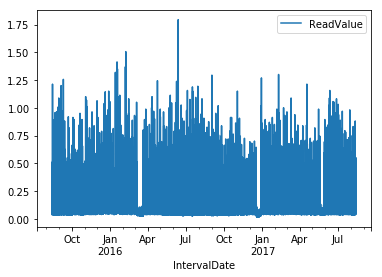

In [61]:
df_hh.plot(y = 'ReadValue')

In [5]:
df[df.index.dayofweek == 6]

,QualityMethod,UpdateDateTime,IntervalValue01,IntervalValue02,IntervalValue03,IntervalValue04,IntervalValue05,IntervalValue06,IntervalValue07,IntervalValue08,...,IntervalValue39,IntervalValue40,IntervalValue41,IntervalValue42,IntervalValue43,IntervalValue44,IntervalValue45,IntervalValue46,IntervalValue47,IntervalValue48
IntervalDate,,,,,,,,,,,,,,,,,,,,,
2015-08-16,A,20150817011118,0.056,0.050,0.063,0.063,0.050,0.056,0.063,0.056,...,0.169,0.131,0.319,0.169,0.169,0.094,0.056,0.050,0.056,0.050
2015-08-23,A,20150824010940,0.056,0.038,0.050,0.056,0.044,0.044,0.056,0.050,...,0.219,0.200,0.175,0.163,0.125,0.063,0.050,0.063,0.038,0.131
2015-08-30,A,20150831010703,0.069,0.050,0.056,0.050,0.038,0.056,0.056,0.038,...,0.613,0.250,0.225,0.125,0.100,0.100,0.050,0.044,0.063,0.050
2015-09-06,A,20150907010557,0.044,0.056,0.063,0.050,0.044,0.056,0.056,0.044,...,0.213,0.213,0.156,0.206,0.275,0.256,0.231,0.100,0.056,0.056
2015-09-13,A,20150914010903,0.050,0.056,0.063,0.063,0.050,0.056,0.063,0.063,...,0.169,0.169,0.188,0.163,0.100,0.088,0.063,0.056,0.050,0.063
2015-09-20,A,20150921010829,0.044,0.056,0.056,0.031,0.056,0.050,0.038,0.056,...,0.131,0.088,0.088,0.106,0.100,0.088,0.063,0.063,0.044,0.050
2015-09-27,A,20150928010827,0.056,0.038,0.063,0.050,0.038,0.050,0.056,0.031,...,0.206,0.188,0.131,0.131,0.531,0.106,0.394,0.081,0.063,0.056
2015-10-04,A,20151005011230,0.050,0.144,0.075,0.056,0.069,0.044,0.044,0.063,...,0.175,0.169,0.144,0.081,0.075,0.075,0.063,0.044,0.056,0.063
2015-10-11,A,20151012010753,0.050,0.056,0.056,0.044,0.050,0.050,0.056,0.038,...,0.163,0.188,0.119,0.088,0.050,0.056,0.069,0.050,0.044,0.056


In [206]:
#data['weekday'] = data.index.weekday
df['weekday'] = data['weekday'].apply(lambda x: 1 if x < 5 else 0)
data

,QualityMethod,UpdateDateTime,IntervalValue01,IntervalValue02,IntervalValue03,IntervalValue04,IntervalValue05,IntervalValue06,IntervalValue07,IntervalValue08,...,IntervalValue40,IntervalValue41,IntervalValue42,IntervalValue43,IntervalValue44,IntervalValue45,IntervalValue46,IntervalValue47,IntervalValue48,weekday
IntervalDate,,,,,,,,,,,,,,,,,,,,,
2015-08-14,A,20150815011330,0.044,0.056,0.063,0.044,0.056,0.056,0.044,0.056,...,0.138,0.094,0.106,0.100,0.094,0.075,0.075,0.050,0.075,1
2015-08-15,A,20150816010916,0.069,0.050,0.069,0.050,0.044,0.056,0.056,0.044,...,0.244,0.275,0.244,0.181,0.163,0.156,0.056,0.056,0.069,0
2015-08-16,A,20150817011118,0.056,0.050,0.063,0.063,0.050,0.056,0.063,0.056,...,0.131,0.319,0.169,0.169,0.094,0.056,0.050,0.056,0.050,0
2015-08-17,A,20150818010941,0.038,0.050,0.056,0.038,0.044,0.056,0.044,0.038,...,0.263,0.238,0.138,0.150,0.081,0.069,0.063,0.056,0.050,1
2015-08-18,A,20150819011152,0.044,0.056,0.050,0.031,0.056,0.050,0.038,0.050,...,0.175,0.213,0.244,0.156,0.125,0.056,0.063,0.056,0.038,1
2015-08-19,A,20150820011126,0.056,0.050,0.038,0.056,0.044,0.038,0.056,0.038,...,0.281,0.256,0.156,0.175,0.156,0.488,0.081,0.356,0.063,1
2015-08-20,A,20150821011056,0.044,0.050,0.056,0.044,0.050,0.056,0.044,0.050,...,0.069,0.063,0.044,0.050,0.050,0.038,0.056,0.038,0.044,1
2015-08-21,A,20150822011038,0.056,0.031,0.050,0.056,0.031,0.050,0.050,0.038,...,0.188,0.200,0.275,0.188,0.150,0.094,0.069,0.056,0.056,1
2015-08-22,A,20150823011043,0.075,0.050,0.113,0.094,0.063,0.056,0.044,0.056,...,0.263,0.225,0.194,0.106,0.088,0.069,0.050,0.044,0.056,0


In [171]:
dataf = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994', '2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592', '2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109', '2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877'],
        'battle_deaths': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41]}
df = pd.DataFrame(dataf, columns = ['date', 'battle_deaths'])
print(df)

                         date  battle_deaths
0  2014-05-01 18:47:05.069722             34
1  2014-05-01 18:47:05.119994             25
2  2014-05-02 18:47:05.178768             26
3  2014-05-02 18:47:05.230071             15
4  2014-05-02 18:47:05.230071             15
5  2014-05-02 18:47:05.280592             14
6  2014-05-03 18:47:05.332662             26
7  2014-05-03 18:47:05.385109             25
8  2014-05-04 18:47:05.436523             62
9  2014-05-04 18:47:05.486877             41


In [173]:
df['date'] = pd.to_datetime(df['date'])

In [176]:
df.index = df['date']
del df['date']
df

,battle_deaths
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


In [183]:
df['weekday'] = df.index.weekday

In [201]:
df['weekday'].apply(lambda x: 1 if x < 5 else 0)

date
2014-05-01 18:47:05.069722    1
2014-05-01 18:47:05.119994    1
2014-05-02 18:47:05.178768    1
2014-05-02 18:47:05.230071    1
2014-05-02 18:47:05.230071    1
2014-05-02 18:47:05.280592    1
2014-05-03 18:47:05.332662    0
2014-05-03 18:47:05.385109    0
2014-05-04 18:47:05.436523    0
2014-05-04 18:47:05.486877    0
Name: weekday, dtype: int64

### Get Public Holidays

In [6]:
from pandas.tseries.holiday import Holiday, EasterMonday, GoodFriday, AbstractHolidayCalendar, next_monday, MO, next_workday, nearest_workday
from pandas.tseries.offsets import DateOffset, CustomBusinessDay
from datetime import datetime
def after_nearest_workday(dt):
    """
    returns next workday after nearest workday
    needed for Boxing day or multiple holidays in a series
    got this from https://stackoverflow.com/questions/30485984/pandas-time-series-holiday-rule-offset
    """
    return next_workday(nearest_workday(dt))

In [7]:
AFLGrandFinal2016 = Holiday('Friday Before Grand Final Day 2016', year = 2016, month=9, day = 30)

In [8]:
class VicCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('New Year\'s day', month = 1, day = 1, observance=next_monday),
        Holiday('Australia Day', month = 1, day = 26, observance=next_monday),
        Holiday('Labour Day', month = 3, day =1, offset = DateOffset(weekday=MO(2))),
        EasterMonday,
        GoodFriday,
        Holiday('Friday Before Grand Final Day 2015', year = 2015, month=10, day = 2),
        Holiday('Friday Before Grand Final Day 2016', year = 2016, month=9, day = 30),
        Holiday('Friday Before Grand Final Day 2017', year = 2017, month=9, day = 29),
        Holiday('ANZAC Day', month = 1, day = 25, observance=next_monday),
        Holiday('Queen\'s Birthday', month = 6, day =1, offset = DateOffset(weekday=MO(2))),
        Holiday('Melbourne Cup Day', month = 11, day =1, offset = DateOffset(weekday=MO(1))),
        Holiday('Christmas Day', month = 12, day =25, observance=next_monday),
        Holiday('Boxing Day', month = 12, day =25, observance=after_nearest_workday)
    ]

In [9]:
cal = VicCalendar()
vicholidays = VicCalendar().holidays(datetime(2016,1,1),datetime(2016,12,31))
# cal.holidays(datetime(2016,1,1),datetime(2016,12,31))
vicholidays

DatetimeIndex(['2016-01-01', '2016-01-25', '2016-01-26', '2016-03-14',
               '2016-03-25', '2016-03-28', '2016-06-13', '2016-09-30',
               '2016-11-07', '2016-12-26', '2016-12-27'],
              dtype='datetime64[ns]', freq=None)

In [83]:
weekend_and_holiday_offset - CustomBusinessDay(calendar=VicCalendar())

<CustomBusinessDay>

In [10]:
df[df.index.isin(vicholidays) ==True]

,QualityMethod,UpdateDateTime,IntervalValue01,IntervalValue02,IntervalValue03,IntervalValue04,IntervalValue05,IntervalValue06,IntervalValue07,IntervalValue08,...,IntervalValue39,IntervalValue40,IntervalValue41,IntervalValue42,IntervalValue43,IntervalValue44,IntervalValue45,IntervalValue46,IntervalValue47,IntervalValue48
IntervalDate,,,,,,,,,,,,,,,,,,,,,
2016-01-01,A,20160102011900,0.075,0.081,0.069,0.063,0.081,0.075,0.069,0.063,...,0.206,0.188,0.138,0.156,0.175,0.438,0.325,0.081,0.088,0.081
2016-01-25,A,20160126011706,0.063,0.050,0.050,0.063,0.063,0.044,0.050,0.050,...,0.200,0.200,0.119,0.125,0.081,0.056,0.069,0.069,0.056,0.050
2016-01-26,A,20160127011556,0.056,0.063,0.056,0.050,0.056,0.056,0.063,0.044,...,0.225,0.188,0.144,0.119,0.094,0.094,0.088,0.075,0.088,0.081
2016-03-14,A,20160315011616,0.050,0.038,0.031,0.044,0.050,0.025,0.038,0.044,...,0.038,0.050,0.038,0.025,0.044,0.050,0.031,0.031,0.044,0.044
2016-03-25,A,20160326011650,0.063,0.063,0.044,0.056,0.063,0.063,0.044,0.063,...,0.150,0.094,0.106,0.119,0.081,0.063,0.063,0.063,0.056,0.044
2016-03-28,A,20160329011338,0.050,0.038,0.056,0.063,0.044,0.044,0.069,0.125,...,0.156,0.138,0.131,0.106,0.081,0.075,0.056,0.056,0.106,0.106
2016-06-13,A,20160614021710,0.038,0.056,0.050,0.044,0.044,0.050,0.056,0.781,...,0.244,0.294,0.163,0.175,0.169,0.181,0.450,0.144,0.394,0.038
2016-09-30,A,20161001011159,0.044,0.038,0.050,0.056,0.031,0.044,0.056,0.038,...,0.244,0.275,0.138,0.144,0.144,0.119,0.075,0.056,0.050,0.044
2016-11-07,A,20161108011123,0.050,0.050,0.044,0.044,0.050,0.056,0.050,0.044,...,0.206,0.175,0.156,0.150,0.056,0.056,0.044,0.044,0.050,0.050


In [12]:
df['daily'] = df.iloc[:,3:51].sum(axis =1)

In [13]:
df

,QualityMethod,UpdateDateTime,IntervalValue01,IntervalValue02,IntervalValue03,IntervalValue04,IntervalValue05,IntervalValue06,IntervalValue07,IntervalValue08,...,IntervalValue40,IntervalValue41,IntervalValue42,IntervalValue43,IntervalValue44,IntervalValue45,IntervalValue46,IntervalValue47,IntervalValue48,daily
IntervalDate,,,,,,,,,,,,,,,,,,,,,
2015-08-14,A,20150815011330,0.044,0.056,0.063,0.044,0.056,0.056,0.044,0.056,...,0.138,0.094,0.106,0.100,0.094,0.075,0.075,0.050,0.075,5.462
2015-08-15,A,20150816010916,0.069,0.050,0.069,0.050,0.044,0.056,0.056,0.044,...,0.244,0.275,0.244,0.181,0.163,0.156,0.056,0.056,0.069,9.849
2015-08-16,A,20150817011118,0.056,0.050,0.063,0.063,0.050,0.056,0.063,0.056,...,0.131,0.319,0.169,0.169,0.094,0.056,0.050,0.056,0.050,7.814
2015-08-17,A,20150818010941,0.038,0.050,0.056,0.038,0.044,0.056,0.044,0.038,...,0.263,0.238,0.138,0.150,0.081,0.069,0.063,0.056,0.050,7.145
2015-08-18,A,20150819011152,0.044,0.056,0.050,0.031,0.056,0.050,0.038,0.050,...,0.175,0.213,0.244,0.156,0.125,0.056,0.063,0.056,0.038,5.553
2015-08-19,A,20150820011126,0.056,0.050,0.038,0.056,0.044,0.038,0.056,0.038,...,0.281,0.256,0.156,0.175,0.156,0.488,0.081,0.356,0.063,6.105
2015-08-20,A,20150821011056,0.044,0.050,0.056,0.044,0.050,0.056,0.044,0.050,...,0.069,0.063,0.044,0.050,0.050,0.038,0.056,0.038,0.044,4.409
2015-08-21,A,20150822011038,0.056,0.031,0.050,0.056,0.031,0.050,0.050,0.038,...,0.188,0.200,0.275,0.188,0.150,0.094,0.069,0.056,0.056,5.397
2015-08-22,A,20150823011043,0.075,0.050,0.113,0.094,0.063,0.056,0.044,0.056,...,0.263,0.225,0.194,0.106,0.088,0.069,0.050,0.044,0.056,6.150


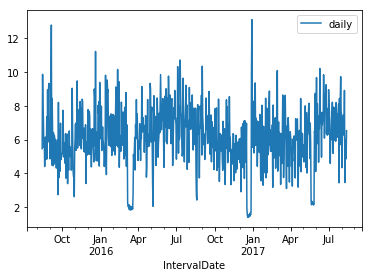

In [18]:
df.plot(y='daily')

In [20]:
df = pd.melt(df, id_vars=['IntervalDate','QualityMethod'], 
        value_vars=['IntervalValue%02d' % (x+1) for x in range(48)],
       var_name = 'Interval', value_name = 'Read')



C:\Users\hoopes\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [21]:
df

,IntervalDate,QualityMethod,Interval,Read
0,NaN,A,IntervalValue01,0.044
1,NaN,A,IntervalValue01,0.069
2,NaN,A,IntervalValue01,0.056
3,NaN,A,IntervalValue01,0.038
4,NaN,A,IntervalValue01,0.044
5,NaN,A,IntervalValue01,0.056
6,NaN,A,IntervalValue01,0.044
7,NaN,A,IntervalValue01,0.056
8,NaN,A,IntervalValue01,0.075
9,NaN,A,IntervalValue01,0.056


In [96]:
data.sort_values(['IntervalDate','Interval'])

,IntervalDate,QualityMethod,Interval,Read
0,2015-08-14,A,IntervalValue01,0.044
731,2015-08-14,A,IntervalValue02,0.056
1462,2015-08-14,A,IntervalValue03,0.063
2193,2015-08-14,A,IntervalValue04,0.044
2924,2015-08-14,A,IntervalValue05,0.056
3655,2015-08-14,A,IntervalValue06,0.056
4386,2015-08-14,A,IntervalValue07,0.044
5117,2015-08-14,A,IntervalValue08,0.056
5848,2015-08-14,A,IntervalValue09,0.056
6579,2015-08-14,A,IntervalValue10,0.038


In [130]:
data['Interval'] = data['Interval'].str.extract('(\d+)').astype(int)

C:\Users\hoopes\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [136]:
ts = pd.DatetimeIndex(data.IntervalDate + data.Interval*pd.to_timedelta(30, unit='T'))
data['HHDateTime'] = ts
# data2['Month'] = ts.month
# data2.head()
data

,IntervalDate,QualityMethod,Interval,Read,Month,HHDateTime
0,2015-08-14,A,1,0.044,8,2015-08-14 00:30:00
1,2015-08-15,A,1,0.069,8,2015-08-15 00:30:00
2,2015-08-16,A,1,0.056,8,2015-08-16 00:30:00
3,2015-08-17,A,1,0.038,8,2015-08-17 00:30:00
4,2015-08-18,A,1,0.044,8,2015-08-18 00:30:00
5,2015-08-19,A,1,0.056,8,2015-08-19 00:30:00
6,2015-08-20,A,1,0.044,8,2015-08-20 00:30:00
7,2015-08-21,A,1,0.056,8,2015-08-21 00:30:00
8,2015-08-22,A,1,0.075,8,2015-08-22 00:30:00
9,2015-08-23,A,1,0.056,8,2015-08-23 00:30:00


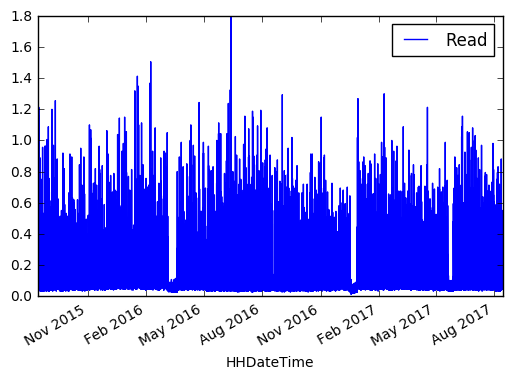

In [143]:
data.plot(x='HHDateTime',y='Read')

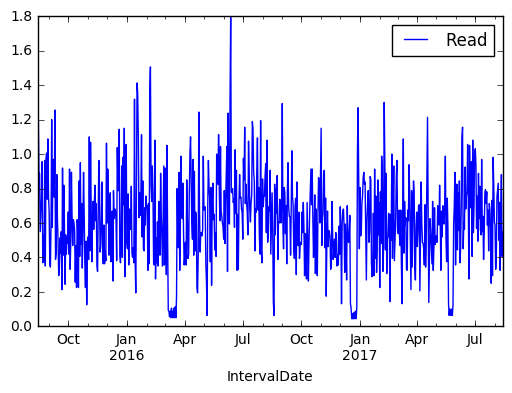

In [109]:
data.groupby(['IntervalDate']).max().plot()

In [115]:
dates = pd.DatetimeIndex(data['IntervalDate'])
dates.month
data['Month'] = dates.month

In [125]:
data.groupby(['Month']).max()

,IntervalDate,QualityMethod,Interval,Read
Month,,,,
1,2017-01-31,A,IntervalValue48,1.413
2,2017-02-28,A,IntervalValue48,1.506
3,2017-03-31,A,IntervalValue48,1.088
4,2017-04-30,A,IntervalValue48,1.244
5,2017-05-31,A,IntervalValue48,1.113
6,2017-06-30,A,IntervalValue48,1.794
7,2017-07-31,A,IntervalValue48,1.194
8,2017-08-13,A,IntervalValue48,1.213
9,2016-09-30,A,IntervalValue48,1.294
